In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [72]:
milk = pd.read_csv("milk.csv").set_index('Animal')

In [73]:
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [74]:
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)

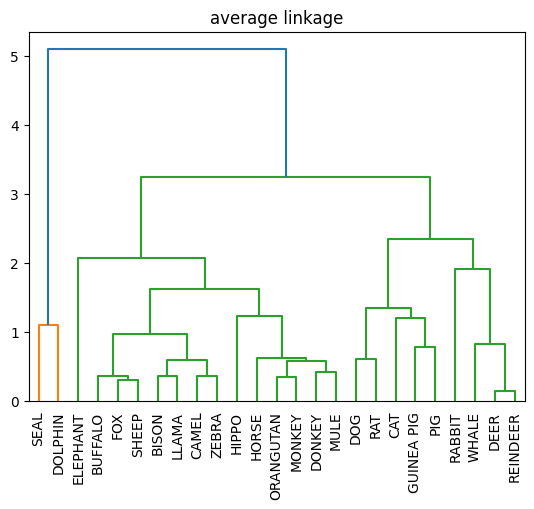

In [75]:
link='average'
mergings = linkage(milk_scaled,method=link)
dendrogram(mergings,labels=list(milk_scaled.index))
plt.title(link + " linkage")
plt.xticks(rotation=90)
plt.show()

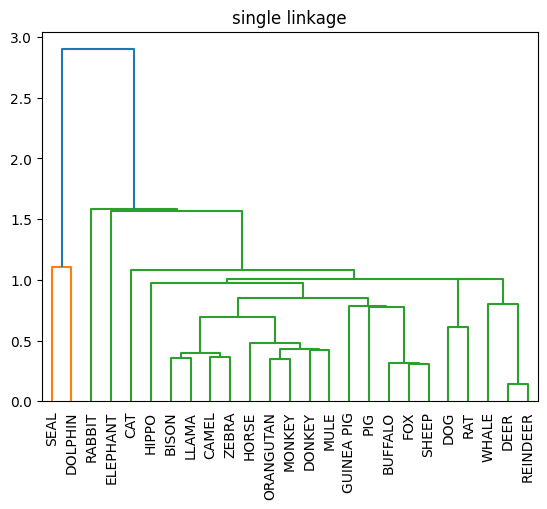

In [76]:
link='single'
mergings = linkage(milk_scaled,method=link)
dendrogram(mergings,labels=list(milk_scaled.index))
plt.title(link + " linkage")
plt.xticks(rotation=90)
plt.show()

In [77]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(milk_scaled)
clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [78]:
milk_scaled.index

Index(['HORSE', 'ORANGUTAN', 'MONKEY', 'DONKEY', 'HIPPO', 'CAMEL', 'BISON',
       'BUFFALO', 'GUINEA PIG', 'CAT', 'FOX', 'LLAMA', 'MULE', 'PIG', 'ZEBRA',
       'SHEEP', 'DOG', 'ELEPHANT', 'RABBIT', 'RAT', 'DEER', 'REINDEER',
       'WHALE', 'SEAL', 'DOLPHIN'],
      dtype='object', name='Animal')

In [79]:
silhouette_score(milk_scaled,clust.labels_)

0.5186847578981009

### silhoutte Score

In [80]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(milk_scaled)
    scores.append(silhouette_score(milk_scaled,clust.labels_))

In [81]:
print(scores)
i_max = np.argmax(scores)
print('Best no of cluster : ',n_clust[i_max])

[0.5186847578981009, 0.48757649189546187, 0.41601538367376095, 0.3830100222472541, 0.37428423003570394]
Best no of cluster :  2


In [82]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(milk_scaled)
clust.labels_

print(silhouette_score(milk_scaled,clust.labels_))

df_clust = pd.DataFrame({'Animal':list(milk_scaled.index),
                         'cluster': list(clust.labels_)}).sort_values(by='cluster')

0.5186847578981009


In [83]:
df_clust

,Animal,cluster
0,HORSE,0
22,WHALE,0
21,REINDEER,0
20,DEER,0
19,RAT,0
18,RABBIT,0
17,ELEPHANT,0
16,DOG,0
15,SHEEP,0
14,ZEBRA,0
